# Advertising Data Analysis And Prediction With Python
## Created And Done By "Anubhav Kumar Gupta"

In [1]:
import IPython.display as dsp
dsp.Image(url='https://previews.123rf.com/images/robuart/robuart1902/robuart190202323/117228198-media-advertisement-vector-television-and-radio-with-antenna-laptop-screen-advertisement-product.jpg',width=500,height=500)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

In [7]:
df.size

1000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df[df.duplicated(subset=df.columns,keep=False)]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

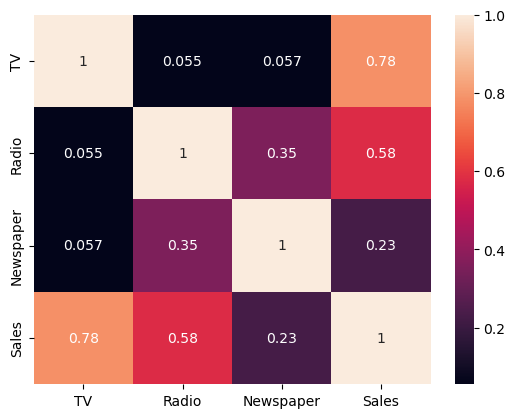

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df_corr_sale=df.corr()['Sales'].to_frame()
df_corr_sale

,Sales
TV,0.782224
Radio,0.576223
Newspaper,0.228299
Sales,1.000000


<Axes: ylabel='Sales'>

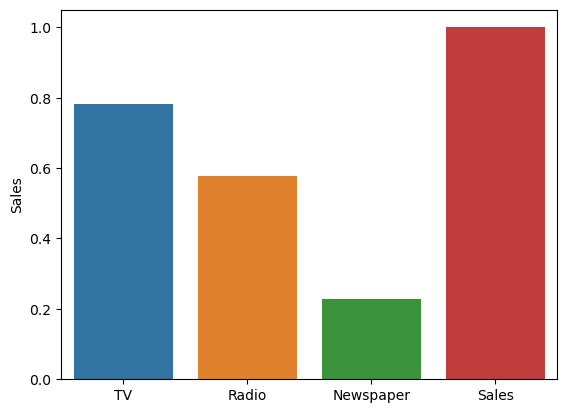

In [18]:
sns.barplot(data=df_corr_sale,x=df_corr_sale.index,y='Sales')

### Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
y=df['Sales']
x=df.drop(['Sales'],axis=1)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [25]:
lr.intercept_

2.7089490925159065

In [26]:
lr.score(x_train,y_train)

0.9055159502227753

In [27]:
lr.score(x_test,y_test)

0.8609466508230368

In [28]:
y_pred=lr.predict(x_test)

In [29]:
y_pred[:5]

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988])

In [30]:
df_test_pred=pd.DataFrame({'Actual Values':y_test,"Predicted values":y_pred})

In [31]:
df_test_pred

,Actual Values,Predicted values
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


### Predictive Analytics

In [32]:
array=np.array([100,50,50])
array

array([100,  50,  50])

In [33]:
new_array=array.reshape(1,-1)
new_array

array([[100,  50,  50]])

In [34]:
y_pred_array=lr.predict(new_array)
y_pred_array

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.42337464])

### Thanks And Regards
## Anubhav Kumar Gupta